In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing import sequence
import numpy as np

# Tokenization
> Phần đầu tiên nhất của NLP là tokenizer/tokenization: biến đổi dữ liệu dạng NLP sang dữ liệu dạng số thông qua việc khởi tạo một tập từ điển map giữa các từ (word) với số (word_index) và bảng đếm số lần xuất hiện của các từ (word_counts).

In [ ]:
# Ví dụ đơn giản về tokenizer:
sentences = [
    'I love my dog'
    , 'I love my cat'
]

In [ ]:
tokenizer = text.Tokenizer(num_words=100) # sự dụng tối đa 100 tokenzers (số)

In [ ]:
?tokenizer.fit_on_texts

Signature: tokenizer.fit_on_texts(texts)
Docstring:
Updates internal vocabulary based on a list of texts.

In the case where texts contains lists,
we assume each entry of the lists to be a token.

Required before using `texts_to_sequences` or `texts_to_matrix`.

# Arguments
    texts: can be a list of strings,
        a generator of strings (for memory-efficiency),
        or a list of list of strings.
File:      ~/miniconda3/envs/tf/lib/python3.8/site-packages/keras_preprocessing/text.py
Type:      method


In [ ]:
# Tokenize texts:
tokenizer.fit_on_texts(sentences)

In [ ]:
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}


In [ ]:
# Thêm câu vào danh sách:
sentences.append("You love my dog!")
sentences

['I love my dog', 'I love my cat', 'You love my dog!']

In [ ]:
# Tokenize tiếp để thêm vào từ điển từ mới.
tokenizer.fit_on_texts(sentences)

In [ ]:
print(tokenizer.word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


In [ ]:
dir(tokenizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 'char_level',
 'document_count',
 'filters',
 'fit_on_sequences',
 'fit_on_texts',
 'get_config',
 'index_docs',
 'index_word',
 'lower',
 'num_words',
 'oov_token',
 'sequences_to_matrix',
 'sequences_to_texts',
 'sequences_to_texts_generator',
 'split',
 'texts_to_matrix',
 'texts_to_sequences',
 'texts_to_sequences_generator',
 'to_json',
 'word_counts',
 'word_docs',
 'word_index']

In [ ]:
tokenizer.word_counts

OrderedDict([('i', 4),
             ('love', 5),
             ('my', 5),
             ('dog', 3),
             ('cat', 2),
             ('you', 1)])

In [ ]:
# Thêm sentence:
sentences.append("Do you think my dog is amazing?")
sentences

['I love my dog',
 'I love my cat',
 'You love my dog!',
 'Do you think my dog is amazing?']

In [ ]:
# Bổ sung thêm từ vào từ điển:
tokenizer.fit_on_texts(sentences)

In [ ]:
# Chúng ta có thể kiểm tra lại word_index khi tokenize xong:
print(tokenizer.word_index)
print(tokenizer.word_counts)

{'my': 1, 'love': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
OrderedDict([('i', 6), ('love', 8), ('my', 9), ('dog', 6), ('cat', 3), ('you', 3), ('do', 1), ('think', 1), ('is', 1), ('amazing', 1)])


__Lưu ý:__
Chúng ta có thể thấy, số lượng word_counts đang cao hơn thực tế tương đối. Đây là vì chúng ta chạy lại `fit_on_texts` cho một list các câu (sentences, cụ thể 3 lần: lần 1 2 câu, lần 2 3 câu, lần 3 4 câu) nhiều lần nên số lượng word_counts bị lặp lại cho các từ/câu đã được đọc rồi. Để việc này không bị xảy ra với các lần tiếp theo, chúng ta chỉ fit_on_texts với các từ/câu mới hoặc bắt đầu lại từ đầu toàn bộ câu để tránh bị lỗi, như sau:

In [ ]:
# Bổ sung thêm từ vào từ điển:
tokenizer = text.Tokenizer(100)
tokenizer.fit_on_texts(sentences)
print(tokenizer.word_index)
print(tokenizer.word_counts)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
OrderedDict([('i', 2), ('love', 3), ('my', 4), ('dog', 3), ('cat', 1), ('you', 2), ('do', 1), ('think', 1), ('is', 1), ('amazing', 1)])


## Biến đổi text
> Sau khi tokenize được text rồi, chúng ta có thể biến đổi một chuối số sáng text và ngược lại. Tất nhiên, số ở đây chính là id mà từ được gán với (index của từ).

In [ ]:
# Biến đổi câu sang chuỗi số vs texts_to_sequences:
tokenizer.texts_to_sequences(["i love my dog"])

[[4, 2, 1, 3]]

In [ ]:
# Biến đổi số sang từ vs sequences to texts:
tokenizer.sequences_to_texts([[1, 2, 3]]), tokenizer.sequences_to_texts([[1], [2], [3]])

(['my love dog'], ['my', 'love', 'dog'])

In [ ]:
# Tất nhiên sẽ có nhiều từ mà ko có trong sequences:
tokenizer.texts_to_sequences(["my dog is 5 years old"]) # chúng ta có hơn 5 từ ở đây, kết quả trả ra chi lả 3: do years, old, 5 không có trong từ điển

[[1, 3, 9]]

In [ ]:
# Và tùy thuộc vào từ điểm và index của từ, có những id sẽ không có trong từ điển để map được với từ:
tokenizer.sequences_to_texts([[1, 12, 3]]) # trong từ điển chỉ có tối đa 10 từ (từ thứ 10 là amazing), nên kết quả trả ra chỉ là 2 từ.

['my dog']

In [ ]:
test_data = [
    "I really love my dog"
    , "my dog eats my hat"
]
tokenizer.texts_to_sequences(test_data)

[[4, 2, 1, 3], [1, 3, 1]]

__Lưu ý:__ điều tương tự xảy ra với cả 2 câu ở trên, cầu đầu chưa có really trong từ điển, câu sau chưa có eats, hat trong từ điển. Tât cả các từ được lặp lại cũng sẽ được trình diễn với các id giống nhau (câu 2 với từ my - id = 1) và theo thứ tự xuất hiện trong câu.
Để tránh việc các từ chưa có trong từ điển không được thể hiện ra với chuỗi số, chúng ta thêm arguement: oov (out of vocabulary - nằm ngoài từ điển).

In [ ]:
tokenizer = text.Tokenizer(num_words=100, oov_token="UNK")
tokenizer.fit_on_texts(sentences)
print(tokenizer.word_index)
print(tokenizer.word_counts)

{'UNK': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
OrderedDict([('i', 2), ('love', 3), ('my', 4), ('dog', 3), ('cat', 1), ('you', 2), ('do', 1), ('think', 1), ('is', 1), ('amazing', 1)])


In [ ]:
tokenizer.texts_to_sequences(test_data)

[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]

Chúng ta có thể thấy với 2 câu ví dụ: really, eats, hat đều được map vào với ký tự nằm ngoài từ điển: UNK có index = 1. Như vậy, kết quả maping ra chuỗi số của chúng ta được hoàn hảo hơn, thay vì bị mất đi id cho các chữ có trong câu.

In [ ]:
tokenizer.sequences_to_texts([[2, 12, 3]])

['my UNK love']

id 12 chưa có trong từ điển nên sẽ được trả về chữa UNK

# Padding
> padding là phương pháp bổ sung 0 vào trong chuỗi số -id của từ. Tương tự như padding trong hình ảnh, số 0 được pad thêm vào cho chuỗi số để chuổi số này (của từng câu hoặc văn bản) có cùng độ dài trước khi chúng ta đưa vào model.

In [ ]:
?sequence.pad_sequences

Signature:
sequence.pad_sequences(
    sequences,
    maxlen=None,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0,
)
Docstring:
Pads sequences to the same length.

This function transforms a list (of length `num_samples`)
of sequences (lists of integers)
into a 2D Numpy array of shape `(num_samples, num_timesteps)`.
`num_timesteps` is either the `maxlen` argument if provided,
or the length of the longest sequence in the list.

Sequences that are shorter than `num_timesteps`
are padded with `value` until they are `num_timesteps` long.

Sequences longer than `num_timesteps` are truncated
so that they fit the desired length.

The position where padding or truncation happens is determined by
the arguments `padding` and `truncating`, respectively.
Pre-padding or removing values from the beginning of the sequence is the
default.

>>> sequence = [[1], [2, 3], [4, 5, 6]]
>>> tf.keras.preprocessing.sequence.pad_sequences(sequence)
array([[0, 0, 1],
       [0, 2, 3],
 

In [ ]:
# Biến đổi chuỗi câu ban đầu sang chuỗi dãy số:
id_sentences = tokenizer.texts_to_sequences(sentences)
id_sentences

[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

In [ ]:
# pad 0s vào chuối dãy số:
padded_id_sentences = sequence.pad_sequences(id_sentences) # mặc định padding='pre' -> pad số 0 vào trước dãy số
padded_id_sentences

array([[ 0,  0,  0,  5,  3,  2,  4],
       [ 0,  0,  0,  5,  3,  2,  7],
       [ 0,  0,  0,  6,  3,  2,  4],
       [ 8,  6,  9,  2,  4, 10, 11]], dtype=int32)

In [ ]:
# Có thể pad vào đằng sau chuỗi dãy số:
padded_id_sentences = sequence.pad_sequences(id_sentences, padding='post')
padded_id_sentences

array([[ 5,  3,  2,  4,  0,  0,  0],
       [ 5,  3,  2,  7,  0,  0,  0],
       [ 6,  3,  2,  4,  0,  0,  0],
       [ 8,  6,  9,  2,  4, 10, 11]], dtype=int32)

## Giới hạn đội dài và các giảm lược dãy số
Nếu chúng ta muốn chỉ có 1 ma trận mà các chuỗi câu có tối đa x id (x từ), chúng ta có thể sử dụng maxlen, Có thể chúng ta sẽ mất đi 1 chuỗi ký số nào đó do chuỗi có độ dài > x, chúng ta có thể lựa chọn việc cắt ở trước hoặc sau chuỗi số tùy thuộc vào cách thức của chúng ta chọn.

In [ ]:
sequence.pad_sequences(id_sentences, padding='post', truncating='post', maxlen=5)

array([[5, 3, 2, 4, 0],
       [5, 3, 2, 7, 0],
       [6, 3, 2, 4, 0],
       [8, 6, 9, 2, 4]], dtype=int32)

Như vậy chúng ta mất đi 2 số cuối cho chuỗi số cuối, và chỉ cần bổ sung thêm 1 số 0 cho các chuỗi số phía trên

In [ ]:
sequence.pad_sequences(id_sentences, padding='post', truncating='post', maxlen=10)

array([[ 5,  3,  2,  4,  0,  0,  0,  0,  0,  0],
       [ 5,  3,  2,  7,  0,  0,  0,  0,  0,  0],
       [ 6,  3,  2,  4,  0,  0,  0,  0,  0,  0],
       [ 8,  6,  9,  2,  4, 10, 11,  0,  0,  0]], dtype=int32)

Nếu chúng ta muốn sử dụng padding để kéo dãn các chuỗi ra về dạng shape theo yêu cầu của arc cần sử dụng, thì sẽ có nhiều số 0 được thêm vào các chuỗi số

In [ ]:
sequence.pad_sequences(id_sentences, padding='post', truncating='post', maxlen=3)

array([[5, 3, 2],
       [5, 3, 2],
       [6, 3, 2],
       [8, 6, 9]], dtype=int32)

# Tokenize Dữ liệu public
> Chúng ta sử dụng dữ liệu kaggle: https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection cho phần Tokenizer dữ liệu public này.

In [ ]:
# Dữ liệu được lưu dạng json, nên chúng ta cần đọc file dạng json:
import json

Từng dòng dữ liệu được hiểu là 1 json, nên để đọc được dữ liệu, chúng ta cần parse từng dòng dữ liệu 1.

In [ ]:
# Trước hết đọc dữ liệu:
path = '/home/ddpham/git/TFExam/data/'
file = open(f'{path}Sarcasm_Headlines_Dataset.json', 'r') # mở file:
lines = file.readlines()

# Đọc từng line:
for i, line in enumerate(lines):
    if i==1: break
    data = json.loads(line)
    print(data.keys())
    print(data)
        
file.close()

dict_keys(['article_link', 'headline', 'is_sarcastic'])
{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}


Vậy là dữ liệu có 3 keys chính: article_link (url), headline (headline của url), is_sarcastic (binary 0 hoặc 1). Chúng ta cũng có sample dữ liệu rồi.
Vậy hãy tiến hành parse dữ liệu:

In [ ]:
file = open(f'{path}Sarcasm_Headlines_Dataset.json', 'r') # mở file:
lines = file.readlines()

sentences = []
labels = []
urls = []

# Đọc từng line:
for line in lines:
    data = json.loads(line)
    sentences.append(data['headline'])    
    labels.append(data['is_sarcastic'])
    urls.append(data['article_link'])
file.close()

In [ ]:
len(sentences), len(labels), len(urls)

(26709, 26709, 26709)

Như vậy chúng ta có 26709 dòng dữ liệu. Hãy thử xem ví dụ một vài dòng:

In [ ]:
sentences[:5]

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way']

In [ ]:
labels[:5]

[0, 0, 1, 1, 0]

In [ ]:
urls[:5]

['https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
 'https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb']

## Tokenize dữ liệu

In [ ]:
tokenizer = text.Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(sentences)

In [ ]:
word_index = tokenizer.word_index
len(word_index)

29657

Trong vocabulary của chúng ta có cả thảy 29657 từ, bao gồm cả UNK.

In [ ]:
# Convert câu sang dạng số:
sentences = tokenizer.texts_to_sequences(sentences)
sentences[:5]

[[308, 15115, 679, 3337, 2298, 48, 382, 2576, 15116, 6, 2577, 8434],
 [4, 8435, 3338, 2746, 22, 2, 166, 8436, 416, 3112, 6, 258, 9, 1002],
 [145, 838, 2, 907, 1749, 2093, 582, 4719, 221, 143, 39, 46, 2, 10736],
 [1485, 36, 224, 400, 2, 1832, 29, 319, 22, 10, 2924, 1393, 6969, 968],
 [767, 719, 4720, 908, 10737, 623, 594, 5, 4, 95, 1309, 92]]

In [ ]:
set(sentences[1])

{2, 4, 6, 9, 22, 166, 258, 416, 1002, 2746, 3112, 3338, 8435, 8436}

In [ ]:
# Chúng ta hay kiểm tra một chút về độ dài của tất cả các câu:
len_sentences = []
for i in sentences:
    len_sentences.append(len(i))
len_dict = dict.fromkeys(set(len_sentences), 0)
for length in len_sentences:
    len_dict[length] += 1
len_dict

{2: 109,
 3: 289,
 4: 518,
 5: 1012,
 6: 1578,
 7: 2177,
 8: 2760,
 9: 3230,
 10: 3458,
 11: 3271,
 12: 2802,
 13: 2005,
 14: 1360,
 15: 861,
 16: 533,
 17: 331,
 18: 189,
 19: 91,
 20: 57,
 21: 30,
 22: 22,
 23: 10,
 24: 4,
 25: 1,
 26: 2,
 27: 1,
 28: 1,
 29: 1,
 30: 2,
 31: 1,
 38: 1,
 39: 1,
 40: 1}

Như vậy, chúng ta có thể thấy là phần lớn các câu có độ dài dưới 20 chữ, có ít nhất 2 chứ và tối đa là 40 chữ.

__Lưu ý:__
Vậy, khi pad thêm dữ liệu, chúng ta cũng cần cân nhắc về việc có nên giới hạn số lượng chữ tối đa hay ko, hay là để mặc định với số lượng lớn nhất. Nếu giới hạn, chúng ta sẽ mất dữ liệu, còn nếu để mặc định, rất nhiều 0s sẽ được pad vào các câu.

<AxesSubplot:xlabel='len'>

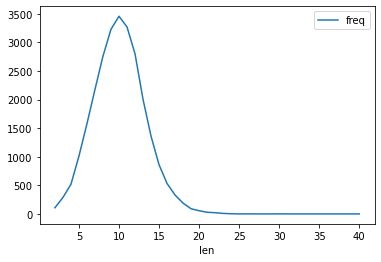

In [ ]:
# Vẽ đồ thị histogram về tần suất độ dài:
import pandas as pd
pd.DataFrame(list(len_dict.items()), columns=['len', 'freq']).plot('len', 'freq')

Chúng ta có thể thử maxlen = 15 hoặc 20 theo như histogram ở trên

In [ ]:
?sequence.pad_sequences

Signature:
sequence.pad_sequences(
    sequences,
    maxlen=None,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0,
)
Docstring:
Pads sequences to the same length.

This function transforms a list (of length `num_samples`)
of sequences (lists of integers)
into a 2D Numpy array of shape `(num_samples, num_timesteps)`.
`num_timesteps` is either the `maxlen` argument if provided,
or the length of the longest sequence in the list.

Sequences that are shorter than `num_timesteps`
are padded with `value` until they are `num_timesteps` long.

Sequences longer than `num_timesteps` are truncated
so that they fit the desired length.

The position where padding or truncation happens is determined by
the arguments `padding` and `truncating`, respectively.
Pre-padding or removing values from the beginning of the sequence is the
default.

>>> sequence = [[1], [2, 3], [4, 5, 6]]
>>> tf.keras.preprocessing.sequence.pad_sequences(sequence)
array([[0, 0, 1],
       [0, 2, 3],
 

In [ ]:
padded_sentences_15 = sequence.pad_sequences(sentences, maxlen=15, padding='post', truncating='post')
padded_sentences_15.shape

(26709, 15)

In [ ]:
# some zeros:
padded_sentences_15[:5, 10:]

array([[ 2577,  8434,     0,     0,     0],
       [    6,   258,     9,  1002,     0],
       [   39,    46,     2, 10736,     0],
       [ 2924,  1393,  6969,   968,     0],
       [ 1309,    92,     0,     0,     0]], dtype=int32)

In [ ]:
padded_sentences_20 = sequence.pad_sequences(sentences, maxlen=20, padding='post', truncating='post')
padded_sentences_20.shape

(26709, 20)

In [ ]:
# a bit more zeros:
padded_sentences_20[:5, 10:]

array([[ 2577,  8434,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    6,   258,     9,  1002,     0,     0,     0,     0,     0,
            0],
       [   39,    46,     2, 10736,     0,     0,     0,     0,     0,
            0],
       [ 2924,  1393,  6969,   968,     0,     0,     0,     0,     0,
            0],
       [ 1309,    92,     0,     0,     0,     0,     0,     0,     0,
            0]], dtype=int32)

In [ ]:
padded_sentences = sequence.pad_sequences(sentences, padding='post')
padded_sentences.shape

(26709, 40)

In [ ]:
# a lot of zeros
padded_sentences[:5,20:]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)